client/client_networkSim3_client_hqc192_benchmark.csv
client/client_networkSim3_client_hqc128_benchmark.csv
client/client_networkSim3_client_bikel3_benchmark.csv
client/client_networkSim3_client_kyber1024_benchmark.csv
client/client_networkSim3_client_kyber768_benchmark.csv
client/client_networkSim3_client_bikel5_benchmark.csv
client/client_networkSim3_client_bikel1_benchmark.csv
client/client_networkSim3_client_kyber512_benchmark.csv
client/client_networkSim3_client_hqc256_benchmark.csv


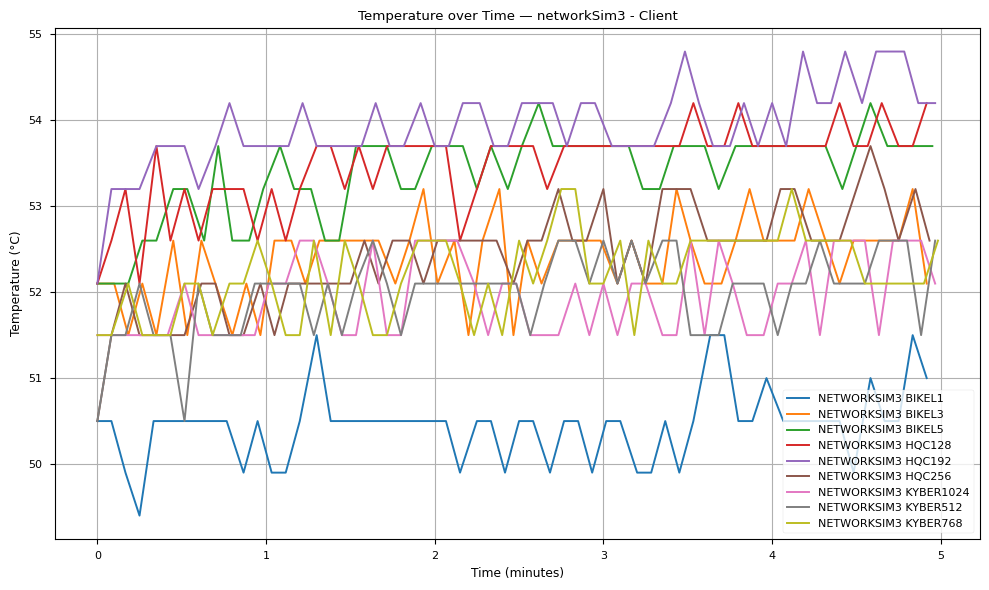

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob
import os

afile = "networkSim3"
type = "Client"
csv_files = glob.glob(f"client/*{afile}*.csv")
for files in csv_files:
    print(files)

def extract_label(filename):
    base = os.path.basename(filename)
    label = base.replace("_benchmark.csv", "").replace("client_", "").replace("networkSim1_", "")
    return label.replace("_", " ").upper()

combined_df = pd.DataFrame()

for file in csv_files:
    label = extract_label(file)
    df = pd.read_csv(file)

    df["timestamp"] = pd.to_datetime(df["timestamp"], format="%H:%M:%S")
    start_time = df["timestamp"].iloc[0]
    df["elapsed_seconds"] = (df["timestamp"] - start_time).dt.total_seconds()
    df["elapsed_minutes"] = df["elapsed_seconds"] / 60

    df["algorithm"] = label
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Plotting temperature over time
plt.figure(figsize=(10, 6))

for label, group in combined_df.groupby("algorithm"):
    plt.plot(group["elapsed_minutes"], group["temp_c"], label=label)

plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°C)")
plt.title(f"Temperature over Time — {afile} - {type}")
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.style.use('Solarize_Light2')
plt.style.use('seaborn-v0_8-paper')

plt.savefig(f"graphs/memory_usage_overtime_{afile}_{type}.png", dpi=300)
plt.show()


In [17]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [10]:
import pandas as pd
import os
import glob

def calculate_memory_stats(afile):
    csv_files = glob.glob(f"*{afile}*.csv")
    results = []

    for file in csv_files:
        df = pd.read_csv(file)
        algo_name = os.path.splitext(os.path.basename(file))[0]
        df['memory_kb'] = pd.to_numeric(df['memory_kb'], errors='coerce')

        mean = df['memory_kb'].mean()
        std = df['memory_kb'].std()

        results.append({
            'Algorithm': algo_name,
            'Mean ± Std Dev (KB)': f"{mean:.2f} ± {std:.2f}"
        })

    results_df = pd.DataFrame(results)
    results_df.sort_values('Algorithm', inplace=True)
    print(results_df.to_string(index=False))


In [10]:
calculate_memory_stats("networkSim1")


                                    Algorithm Mean ± Std Dev (KB)
   client_networkSim1_client_bikel1_benchmark      5632.00 ± 0.00
   client_networkSim1_client_bikel3_benchmark     5627.59 ± 33.61
   client_networkSim1_client_bikel5_benchmark     5851.43 ± 93.63
   client_networkSim1_client_hqc128_benchmark     5757.83 ± 16.66
   client_networkSim1_client_hqc192_benchmark     5998.34 ± 55.97
   client_networkSim1_client_hqc256_benchmark     5874.53 ± 46.43
client_networkSim1_client_kyber1024_benchmark      5888.00 ± 0.00
 client_networkSim1_client_kyber512_benchmark      5888.00 ± 0.00
 client_networkSim1_client_kyber768_benchmark      5760.00 ± 0.00


In [11]:
calculate_memory_stats("networkSim2")


                                    Algorithm Mean ± Std Dev (KB)
   client_networkSim2_client_bikel1_benchmark      5632.00 ± 0.00
   client_networkSim2_client_bikel3_benchmark     5629.79 ± 16.81
   client_networkSim2_client_bikel5_benchmark      5888.00 ± 0.00
   client_networkSim2_client_hqc128_benchmark      5760.00 ± 0.00
   client_networkSim2_client_hqc192_benchmark     5987.31 ± 68.00
   client_networkSim2_client_hqc256_benchmark     5881.26 ± 28.84
client_networkSim2_client_kyber1024_benchmark      5888.00 ± 0.00
 client_networkSim2_client_kyber512_benchmark     5885.83 ± 16.66
 client_networkSim2_client_kyber768_benchmark     5757.83 ± 16.66


In [12]:
calculate_memory_stats("networkSim3")


                                    Algorithm Mean ± Std Dev (KB)
   client_networkSim3_client_bikel1_benchmark      5632.00 ± 0.00
   client_networkSim3_client_bikel3_benchmark     5620.97 ± 43.45
   client_networkSim3_client_bikel5_benchmark     5858.29 ± 80.92
   client_networkSim3_client_hqc128_benchmark     5749.15 ± 35.95
   client_networkSim3_client_hqc192_benchmark     6000.55 ± 48.42
   client_networkSim3_client_hqc256_benchmark     5879.02 ± 32.99
client_networkSim3_client_kyber1024_benchmark      5888.00 ± 0.00
 client_networkSim3_client_kyber512_benchmark      5888.00 ± 0.00
 client_networkSim3_client_kyber768_benchmark     5757.83 ± 16.66


In [9]:
calculate_memory_stats("networkSim4")


                                    Algorithm Mean ± Std Dev (KB)
   client_networkSim4_client_bikel1_benchmark     5629.79 ± 16.81
   client_networkSim4_client_bikel3_benchmark     5629.79 ± 16.81
   client_networkSim4_client_bikel5_benchmark     5858.29 ± 84.52
   client_networkSim4_client_hqc128_benchmark     5753.49 ± 28.36
   client_networkSim4_client_hqc192_benchmark     6000.55 ± 59.11
   client_networkSim4_client_hqc256_benchmark     5883.51 ± 23.76
client_networkSim4_client_kyber1024_benchmark     5883.66 ± 33.33
 client_networkSim4_client_kyber512_benchmark     5885.83 ± 16.66
 client_networkSim4_client_kyber768_benchmark      5760.00 ± 0.00
